# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 7.5: Algoritmos de agrupamento**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta o uso dos algoritmos de agrupamento*

## Preparação dos dados e geração dos grupos

In [ ]:
import numpy as np
import random
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
def plot_2d_data_with_labels(X, y, title='2D Data Plot'):
    """
    Plots 2D data points with labels using different colors.

    Parameters:
    X (array-like): 2D array of data points with shape (n_samples, 2)
    y (array-like): 1D array of labels with shape (n_samples,)
    title (str): Title of the plot
    """
    # Ensure X is a 2D array and y is a 1D array
    X = np.array(X)
    y = np.array(y)

    if X.shape[1] != 2:
        raise ValueError("X should be a 2D array with shape (n_samples, 2)")

    unique_labels = np.unique(y)

    # Default color palette
    default_colors = ['navy', 'turquoise', 'darkorange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

    # Create a color dictionary from unique labels
    color_dict = {label: default_colors[i % len(default_colors)] for i, label in enumerate(unique_labels)}

    plt.figure(figsize=(5, 3))

    # Plot each label with its corresponding color
    for label in unique_labels:
        plt.scatter(X[y == label, 0], X[y == label, 1], color=color_dict[label], label=label, alpha=0.8, lw=2)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

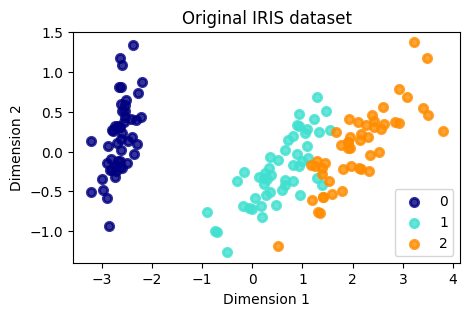

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
plot_2d_data_with_labels(X_r, y, title='Original IRIS dataset')

# K-means

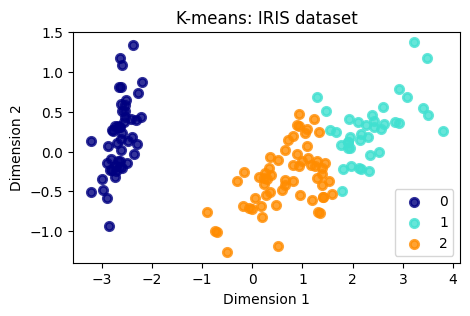

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto', random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plot_2d_data_with_labels(X_r, y_kmeans, title='K-means: IRIS dataset')

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [ ]:
import pandas as pd
pd.DataFrame(kmeans.transform(X))

,0,1,2
0,0.141351,5.031328,3.412511
1,0.447638,5.087506,3.389640
2,0.417109,5.252292,3.560114
3,0.525338,5.127043,3.412319
4,0.188627,5.076381,3.460312
...,...,...,...
145,4.609163,0.596489,1.463317
146,4.217675,1.083988,0.906707
147,4.411845,0.632175,1.193900
148,4.599259,0.831837,1.518785


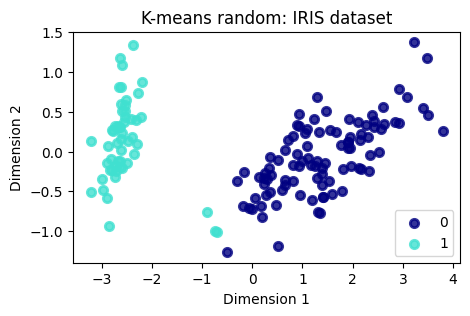

In [ ]:
kmeans = KMeans(n_clusters=2, init='random', n_init=30, max_iter=300, random_state=0)
kmeans.fit(X)
plot_2d_data_with_labels(X_r, kmeans.labels_, title='K-means random: IRIS dataset')

# Hierárquico

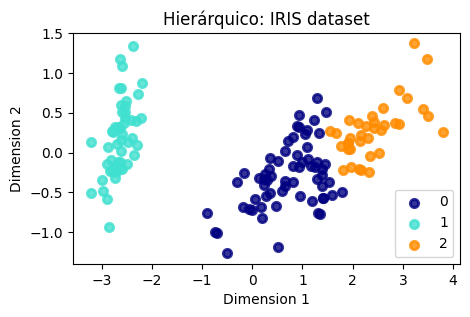

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(X)
plot_2d_data_with_labels(X_r, clustering.labels_, title='Hierárquico: IRIS dataset')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

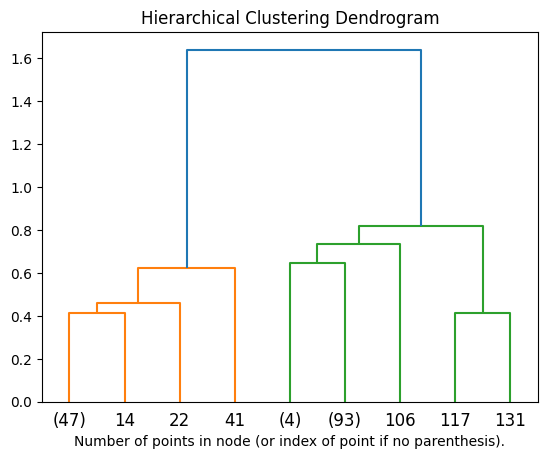

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# DBSCAN

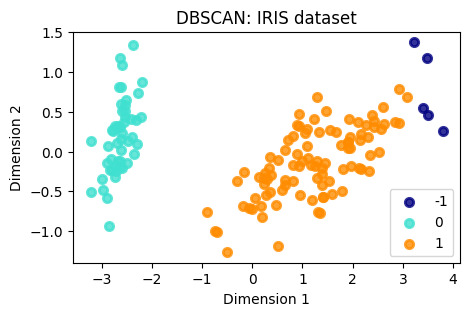

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(X)
plot_2d_data_with_labels(X_r, dbscan.labels_, title='DBSCAN: IRIS dataset')